In [1]:
import numpy as np
np.set_printoptions(precision = 3)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('precision',2)
import scipy.io as io
import json
from copy import deepcopy
import scipy.stats as stats
import seaborn as sns
#import pyvttbl as pt
#sns.reset_orig() # to reset to matplotlib defaults if need be 
# choose colors that work for most color-blind folks
#sns.set_palette("colorblind")
sns.set(color_codes=True)
sns.set_style('white')
sns.set_context('poster')
import glob

In [2]:
subjects = ['OGWM_101', 'OGWM_103','OGWM_104', 'OGWM_105', 'OGWM_106']
df_combined = pd.DataFrame() # empty DataFrame 
df_means = pd.DataFrame()
df_all_trials = pd.DataFrame()

In [3]:
glob.glob('*.txt')

['OGWM_word_SD_block_comp_TBS_OGWM_101_sess_1_no_TMS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_101_sess_2_PFC_cTBS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_103_sess_1_PFC_cTBS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_103_sess_2_no_TMS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_103_sess_3_PFC_iTBS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_104_sess_1_PFC_cTBS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_104_sess_2_no_TMS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_105_sess_1_no_TMS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_105_sess_2_PFC_cTBS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_105_sess_3_PFC_iTBS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_106_sess_1_no_TMS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_106_sess_2_PFC_cTBS.txt',
 'OGWM_word_SD_block_comp_TBS_OGWM_106_sess_3_PFC_iTBS.txt']

In [4]:
# loop through and groupby compatibilit and block to make new dataframe, 
#  from which a factor plot with variance can be plotted

files = glob.glob('*.txt')

for file in files: 

    fname = file
    df = pd.read_csv(fname, header = 0, sep = '\s+') # read in df for the subject
    # df = df[(df.ACC == 1) & (df.probeACC == 1)] # keep only correct trials 
    df = df[['subject','session','target','block','BlockType','TrialType','move_init_bound_msecRT', 'enter_box_msecRT', 'velocity_drop_msecRT', 'msecRT', 'ACC', 'probemsecRT', 'probeACC']]
    df['msecRT'] = pd.to_numeric(df['msecRT'], errors = 'coerce')
    df['move_init_bound_msecRT'] = pd.to_numeric(df['move_init_bound_msecRT'], errors = 'coerce')
    df['enter_box_msecRT'] = pd.to_numeric(df['enter_box_msecRT'], errors = 'coerce')
    df['velocity_drop_msecRT'] = pd.to_numeric(df['velocity_drop_msecRT'], errors = 'coerce')
    df['probemsecRT'] = pd.to_numeric(df['probemsecRT'], errors = 'coerce')
    df_combined = pd.concat([df_combined, df])

In [5]:
df_combined.sample(15)

,subject,session,target,block,BlockType,TrialType,move_init_bound_msecRT,enter_box_msecRT,velocity_drop_msecRT,msecRT,ACC,probemsecRT,probeACC
87,OGWM_101,sess_2,PFC_cTBS,3,invalid,incompatible,857.0,1027.0,1127.0,1202.0,1,478,1
257,OGWM_106,sess_1,no_TMS,8,neutral,incompatible,389.0,509.0,607.0,756.0,1,400,1
253,OGWM_105,sess_3,PFC_iTBS,8,valid,compatible,317.0,387.0,679.0,804.0,1,481,1
128,OGWM_104,sess_2,no_TMS,4,invalid,incompatible,709.0,931.0,1099.0,1116.0,1,473,1
143,OGWM_104,sess_2,no_TMS,4,invalid,compatible,439.0,525.0,711.0,766.0,1,460,1
68,OGWM_101,sess_2,PFC_cTBS,2,invalid,incompatible,557.0,609.0,675.0,884.0,1,857,1
286,OGWM_103,sess_2,no_TMS,8,neutral,incompatible,481.0,687.0,855.0,870.0,1,539,1
12,OGWM_104,sess_2,no_TMS,1,neutral,compatible,573.0,745.0,929.0,940.0,1,457,1
113,OGWM_103,sess_2,no_TMS,4,invalid,incompatible,461.0,667.0,733.0,794.0,1,856,1
157,OGWM_101,sess_2,PFC_cTBS,5,valid,incompatible,545.0,1329.0,817.0,1528.0,1,718,1


In [6]:
grouped_subject = df_combined.groupby('subject') # group by subject name 

In [7]:
grouped_subject[('ACC', 'probeACC')].aggregate(np.mean) # aggregate within group by passing np.mean function 

,ACC,probeACC
subject,,
OGWM_101,0.99,0.99
OGWM_103,0.99,0.98
OGWM_104,0.97,0.91
OGWM_105,1.00,0.99
OGWM_106,0.98,0.95


### Trim outlier RTs per subject

In [8]:
def trim_outlier_RTs(df_data, DV):
    """
    Loop through subjects incombined dataframe and trim outlierrs +/- 3 SD from mean RT within each subject
    
    df_data: Pandas DataFrame concatenated across subjects 
    DV: dependent variable to trim 
    """
    
    df_combined_trimmed = pd.DataFrame()
    subjects = df_data.subject.unique()
    
    for sub in subjects:
        df_sub = df_data[df_data.subject == sub]
        df_sub_trimmed = trim_outliers_subject(df_sub, DV)
        df_combined_trimmed = pd.concat([df_combined, df_sub_trimmed])
        
    print('Original data shape: ', df_data.shape)
    print('Trimmed data shape: ', df_combined_trimmed.shape)
    return df_combined_trimmed 

def trim_outliers_subject(df_sub, DV):
    """
    Within a given subject's data, trim RTs +/- 3 SD from mean RT
    """
    rt_dist = df_sub[DV]
    rt_mean = np.mean(rt_dist)
    rt_std = np.std(rt_dist)
    
    bool_outliers = np.abs(rt_dist - rt_mean) > rt_std*3 # boolean indices for the outliers 
    df_sub_trimmed = df_sub[np.logical_not(bool_outliers)] # keep all data that is NOT outlier 
    
    outliers = rt_dist[(rt_dist - rt_mean) > rt_std*3]
    print('Outlier {} for subject {}: \n {}\n'.format(DV, df_sub.subject.unique(),outliers))
    #rt_include = rt_dist[np.logical_not(np.absolute(rt_dist - rt_mean) > rt_std*3)]
    
    return df_sub_trimmed 

In [9]:
df_combined_trimmed = trim_outlier_RTs(df_combined, 'msecRT')
df_combined_trimmed = trim_outlier_RTs(df_combined_trimmed, 'move_init_bound_msecRT')

Outlier msecRT for subject ['OGWM_101']: 
 0      1855.0
79     1930.0
147    1764.0
165    1784.0
192    1916.0
198    1824.0
222    1766.0
223    1724.0
6      1834.0
10     1738.0
35     1762.0
63     1950.0
223    1888.0
225    1794.0
278    1778.0
Name: msecRT, dtype: float64

Outlier msecRT for subject ['OGWM_103']: 
 22     1738.0
83     1744.0
100    1806.0
107    1666.0
141    1816.0
146    1760.0
175    1732.0
221    1656.0
315    1716.0
28     1706.0
31     1816.0
49     1640.0
75     1644.0
147    1776.0
224    1650.0
297    1918.0
Name: msecRT, dtype: float64

Outlier msecRT for subject ['OGWM_104']: 
 Series([], Name: msecRT, dtype: float64)

Outlier msecRT for subject ['OGWM_105']: 
 143    1694.0
50     1698.0
9      1652.0
68     1558.0
93     1820.0
106    1488.0
132    1582.0
206    1970.0
249    1482.0
Name: msecRT, dtype: float64

Outlier msecRT for subject ['OGWM_106']: 
 175    1962.0
250    1976.0
123    1940.0
162    1946.0
294    1954.0
Name: msecRT, dtype: fl

In [10]:
# Add a movement time parameter
df_combined_trimmed['movement_time_msecRT'] = df_combined_trimmed['msecRT'] - df_combined_trimmed['move_init_bound_msecRT']

In [11]:
grouped_subj_TT = df_combined_trimmed.groupby(['subject', 'target', 'TrialType'], as_index=False)
grouped_subj_TT_means = grouped_subj_TT.aggregate(np.mean) # aggregate within group by passing np.mean function
#grouped_subj_TT_means

In [12]:
grouped_subj_TT_BT = df_combined_trimmed.groupby(['subject','target','TrialType','BlockType'], as_index=False)
grouped_subj_TT_BT_means = grouped_subj_TT_BT.aggregate(np.mean) # aggregate within group by passing np.mean function
grouped_subj_TT_BT_means


,subject,target,TrialType,BlockType,block,move_init_bound_msecRT,enter_box_msecRT,velocity_drop_msecRT,msecRT,ACC,probemsecRT,probeACC,movement_time_msecRT
0,OGWM_101,PFC_cTBS,compatible,invalid,4.43,575.43,716.27,796.73,938.09,0.96,677.48,1.00,381.73
1,OGWM_101,PFC_cTBS,compatible,neutral,5.33,480.54,639.04,757.96,873.83,1.00,704.96,1.00,393.30
2,OGWM_101,PFC_cTBS,compatible,valid,5.35,492.36,614.04,727.38,857.74,1.00,673.20,1.00,365.38
3,OGWM_101,PFC_cTBS,incompatible,invalid,4.31,672.04,850.91,947.21,1077.25,1.00,729.07,1.00,405.21
4,OGWM_101,PFC_cTBS,incompatible,neutral,5.33,633.74,776.79,912.31,1076.39,0.98,716.04,0.98,442.65
5,OGWM_101,PFC_cTBS,incompatible,valid,5.26,608.57,861.09,848.05,1076.26,1.00,682.52,0.96,467.70
6,OGWM_101,no_TMS,compatible,invalid,5.00,591.25,732.42,823.83,996.92,1.00,771.00,0.96,405.67
7,OGWM_101,no_TMS,compatible,neutral,5.67,537.19,679.60,776.17,949.43,0.98,371066.52,0.96,434.66
8,OGWM_101,no_TMS,compatible,valid,4.33,509.73,682.97,781.45,930.48,1.00,899.12,1.00,420.74
9,OGWM_101,no_TMS,incompatible,invalid,5.00,622.71,799.42,918.14,1053.78,0.99,782.25,0.99,429.89


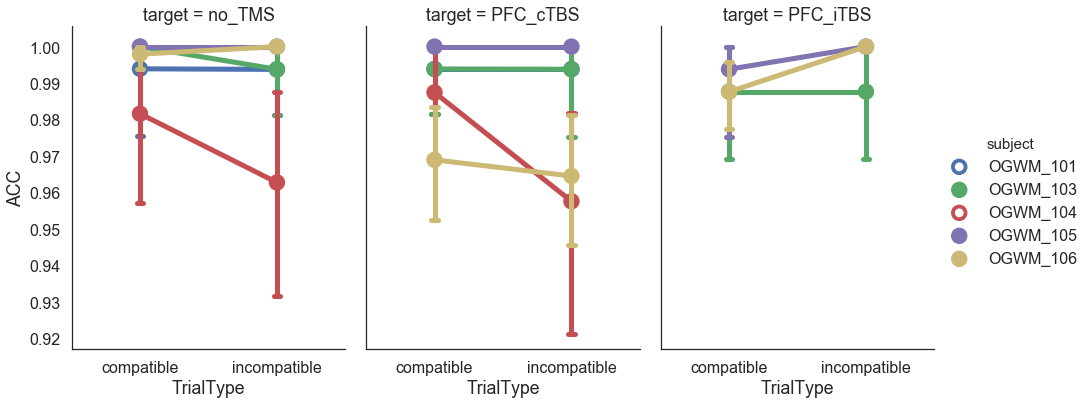

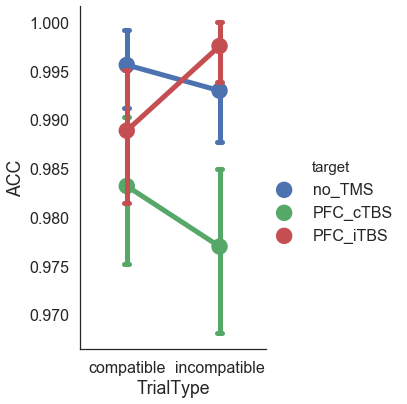

In [13]:
g = sns.factorplot(x="TrialType", y="ACC", hue="subject", col="target", data=df_combined_trimmed, 
                   capsize=0.05, size=6, aspect=.75)

# look at group mean 
g = sns.factorplot(x="TrialType", y="ACC", hue="target", data=df_combined_trimmed, 
                   capsize=0.05, size=6, aspect=.75)

In [14]:
# only use correct trials for RT
df_combined_trimmed = df_combined_trimmed[(df_combined_trimmed.ACC == 1) & (df_combined_trimmed.probeACC == 1)]

grouped_subj_TT = df_combined_trimmed.groupby(['subject', 'target', 'TrialType'], as_index=False)
grouped_subj_TT_means = grouped_subj_TT.aggregate(np.mean) # aggregate within group by passing np.mean function

grouped_subj_TT_BT = df_combined_trimmed.groupby(['subject','target','TrialType','BlockType'], as_index=False)
grouped_subj_TT_BT_means = grouped_subj_TT_BT.aggregate(np.mean) # aggregate within group by passing np.mean function

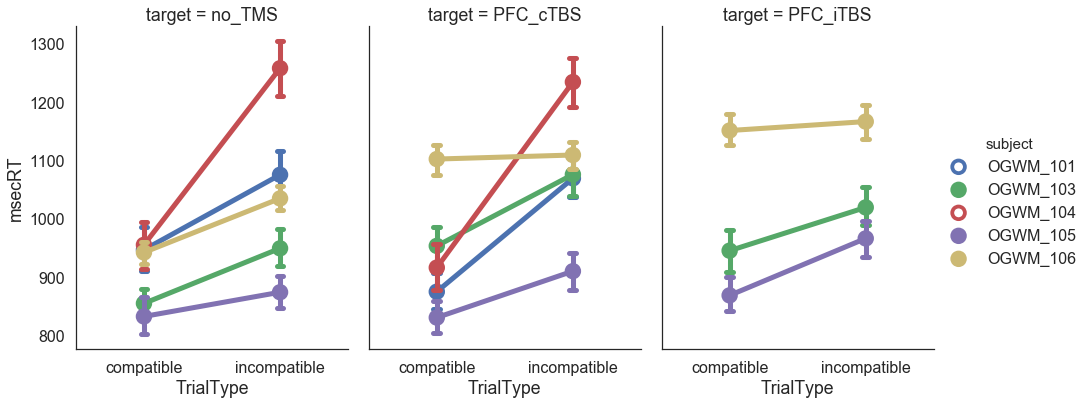

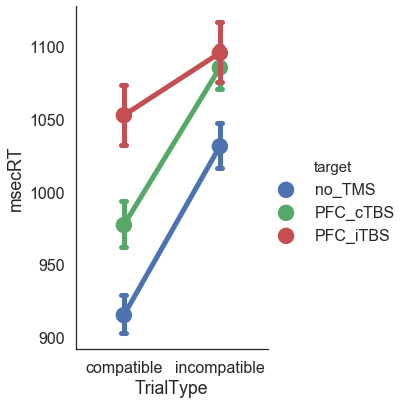

In [15]:
g = sns.factorplot(x="TrialType", y="msecRT", hue="subject", col="target", data=df_combined_trimmed, 
                   capsize=0.05, size=6, aspect=.75)

# look at group mean 
g = sns.factorplot(x="TrialType", y="msecRT", hue="target", data=df_combined_trimmed, 
                   capsize=0.05, size=6, aspect=.75)

In [16]:
# setting for factor plots below

#DV = 'move_init_bound_msecRT'
#DV = 'movement_time_msecRT'
DV = 'msecRT'

pal = [(0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.55294117647058827, 0.62745098039215685, 0.79607843137254897),
           (0.9882352941176471, 0.55294117647058827, 0.3843137254901961)]

    valid  neutral  invalid
0 -255.16  -111.47   -62.04
1  -42.45  -130.36   -29.90
2 -389.14  -192.82  -193.91
3  -55.95   -20.22    10.90
4  -19.65  -101.62  -113.94
    valid  neutral  invalid
0 -185.90  -191.30  -139.16
1 -170.32   -45.53   -98.40
2 -321.23  -281.92  -294.26
3  -81.03   -80.43   -47.69
4   78.29   -11.71    17.70
    valid  neutral  invalid
0  -77.71   -51.74   -98.39
1  -33.54   -65.69  -130.92
2 -104.34   -13.63   -92.88


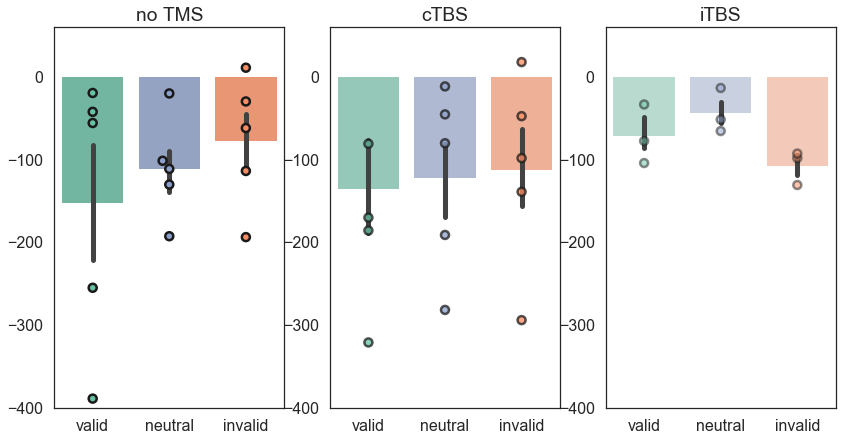

In [17]:
# plot of difference scores by block type 
data = grouped_subj_TT_BT_means
diffs = pd.DataFrame()
diffs_cTBS = pd.DataFrame()
diffs_iTBS = pd.DataFrame()
pal_dark = ['#4daf4a','#377eb8','#e41a1c']
pal_light = ['#ccebc5','#b3cde3','#fbb4ae']


TTs = ['compatible', 'incompatible']
types = ['valid', 'neutral', 'invalid']

for i in range(len(types)):
    # get difference scores
    diffs[types[i]] = np.array(data[(data.BlockType==types[i]) & (data.TrialType=='compatible') & (data.target=='no_TMS')][DV]) - np.array(data[(data.BlockType==types[i]) & (data.TrialType=='incompatible') & (data.target=='no_TMS')][DV])
    diffs_cTBS[types[i]] = np.array(data[(data.BlockType==types[i]) & (data.TrialType=='compatible') & (data.target=='PFC_cTBS')][DV]) - np.array(data[(data.BlockType==types[i]) & (data.TrialType=='incompatible') & (data.target=='PFC_cTBS')][DV])
    diffs_iTBS[types[i]] = np.array(data[(data.BlockType==types[i]) & (data.TrialType=='compatible') & (data.target=='PFC_iTBS')][DV]) - np.array(data[(data.BlockType==types[i]) & (data.TrialType=='incompatible') & (data.target=='PFC_iTBS')][DV])

fig, ax = plt.subplots(1,3, figsize=(14,7))
sns.barplot(data=diffs, ax=ax[0],ci=68, palette=pal, alpha=1)
sns.barplot(data=diffs_cTBS, ax=ax[1], ci=68, palette=pal, alpha = 0.75)
#ax[1].get_children()[0].set_hatch('/')
sns.barplot(data=diffs_iTBS, ax=ax[2], ci=68, palette=pal, alpha=0.5)
#ax[2].get_children()[0].set_hatch('-')
sns.swarmplot(data=diffs, split=True, edgecolor='k', linewidth=2.5, size=8, palette = pal, ax=ax[0])
sns.swarmplot(data=diffs_cTBS, split=True, edgecolor='k', linewidth=2.5, size=8, palette = pal, ax=ax[1],alpha = 0.75)
sns.swarmplot(data=diffs_iTBS, split=True, edgecolor='k', linewidth=2.5, size=8, palette = pal, ax=ax[2],alpha = 0.5)


sns.despine(right = False, top = False)
y_range = (-400,60)
ax[0].set_ylim(y_range)
ax[1].set_ylim(y_range)
ax[2].set_ylim(y_range)
ax[0].set_title('no TMS')
ax[1].set_title('cTBS')
ax[2].set_title('iTBS')


print(diffs)
print(diffs_cTBS)
print(diffs_iTBS)

plt.savefig('OGWM_block_TMS_factorplot_bar_{}.png'.format(DV), dpi=300)

In [19]:
# # df_diffs = pd.concat([diffs, diffs_TMS])
# # df_diffs['TMS'] = ['no TMS']*5 + ['PFC cTBS']*5
# # print(df_diffs)
# df_test = pd.DataFrame({'RT_diff': np.concatenate((np.array(diffs).flatten(), np.array(diffs_TMS).flatten())), 
#                          'block': types*10, 'TMS':(['no TMS']*15 + ['PFC cTBS']*15), 'sub': np.tile(np.repeat(subjects,3),2)})
# #np.concatenate((np.array(diffs).flatten(), np.array(diffs_TMS).flatten()))
# print(df_test)

# # double bar chart
# ax = sns.factorplot(x='block', y='RT_diff', hue = 'TMS', data=df_test, kind = 'bar', size=8, ci=68, palette = ['g', 'b', 'b'])
# ax = sns.swarmplot(x='block', y='RT_diff', hue = 'TMS', data=df_test, split=True, edgecolor='k', linewidth=2.5, size=8, color='gray')
# ax.legend_.remove()

# ax.get_children()[0].set_color('g')
# ax.get_children()[0].set_edgecolor('k')
# #ax.get_children()[0].set_linewidth(3)
# ax.get_children()[1].set_color('lightgreen')
# ax.get_children()[1].set_edgecolor('k')
# ax.get_children()[2].set_color('b') 
# ax.get_children()[2].set_edgecolor('k')
# ax.get_children()[3].set_color('lightblue') 
# ax.get_children()[3].set_edgecolor('k')
# ax.get_children()[4].set_color('r')
# ax.get_children()[4].set_edgecolor('k')
# ax.get_children()[5].set_color('lightcoral')
# ax.get_children()[5].set_edgecolor('k')



# ax.get_children()[8].set_color('g')
# ax.get_children()[9].set_color('b') 
# ax.get_children()[10].set_color('r') 
# ax.get_children()[11].set_color('lightgreen')
# ax.get_children()[12].set_color('lightblue') 
# ax.get_children()[13].set_color('lightcoral')
# #plt.savefig('OGWM_block_TMS_factorplot_bar.png', dpi=300)

# # factorplot group means
# #sns.factorplot(x='block', y='RT_diff', hue = 'TMS', data=df_test, kind = 'point', size=8, ci=68, dodge=True)
# # factorplot with individuals
# #sns.factorplot(x='block', y='RT_diff', hue = 'sub', col = 'TMS', data=df_test, kind = 'point', size=8, ci=68, dodge=True)


In [ ]:
# ax=sns.barplot(x='block', y='RT_diff', hue = 'TMS', data=df_test, ci=68, palette = ['g', 'b'])
# # Select which box you want to change    

# # Change the appearance of that box
# #mybox.set_facecolor('red')
# ax.get_children()[0].set_color('g') 
# ax.get_children()[1].set_color('b') 
# ax.get_children()[2].set_color('r') 

# ax.get_children()[3].set_color('lightgreen')
# ax.get_children()[4].set_color('lightblue') 
# ax.get_children()[5].set_color('lightcoral')

In [ ]:
np.repeat(subjects,3)

In [21]:
TTs = ['compatible', 'incompatible']
types = ['valid', 'neutral', 'invalid']

mean_plots = np.empty(shape = (3,len(TTs)))
mean_plots_cTBS = np.empty(shape = (3,len(TTs)))
mean_plots_iTBS = np.empty(shape = (3,len(TTs)))
data = grouped_subj_TT_BT_means

for i, TT in enumerate(TTs):     
    mean_plots[0,i] = data[(data.BlockType == types[0]) & (data.TrialType == TT)&(data.target=='no_TMS')].aggregate({'msecRT': np.mean}) 
    mean_plots[1,i] = data[(data.BlockType == types[1]) & (data.TrialType == TT)&(data.target=='no_TMS')].aggregate({'msecRT': np.mean}) 
    mean_plots[2,i] = data[(data.BlockType == types[2]) & (data.TrialType == TT)&(data.target=='no_TMS')].aggregate({'msecRT': np.mean})
    
    mean_plots_cTBS[0,i] = data[(data.BlockType == types[0]) & (data.TrialType == TT)&(data.target=='PFC_cTBS')].aggregate({'msecRT': np.mean}) 
    mean_plots_cTBS[1,i] = data[(data.BlockType == types[1]) & (data.TrialType == TT)&(data.target=='PFC_cTBS')].aggregate({'msecRT': np.mean}) 
    mean_plots_cTBS[2,i] = data[(data.BlockType == types[2]) & (data.TrialType == TT)&(data.target=='PFC_cTBS')].aggregate({'msecRT': np.mean})
    
    mean_plots_iTBS[0,i] = data[(data.BlockType == types[0]) & (data.TrialType == TT)&(data.target=='PFC_iTBS')].aggregate({'msecRT': np.mean}) 
    mean_plots_iTBS[1,i] = data[(data.BlockType == types[1]) & (data.TrialType == TT)&(data.target=='PFC_iTBS')].aggregate({'msecRT': np.mean}) 
    mean_plots_iTBS[2,i] = data[(data.BlockType == types[2]) & (data.TrialType == TT)&(data.target=='PFC_iTBS')].aggregate({'msecRT': np.mean})

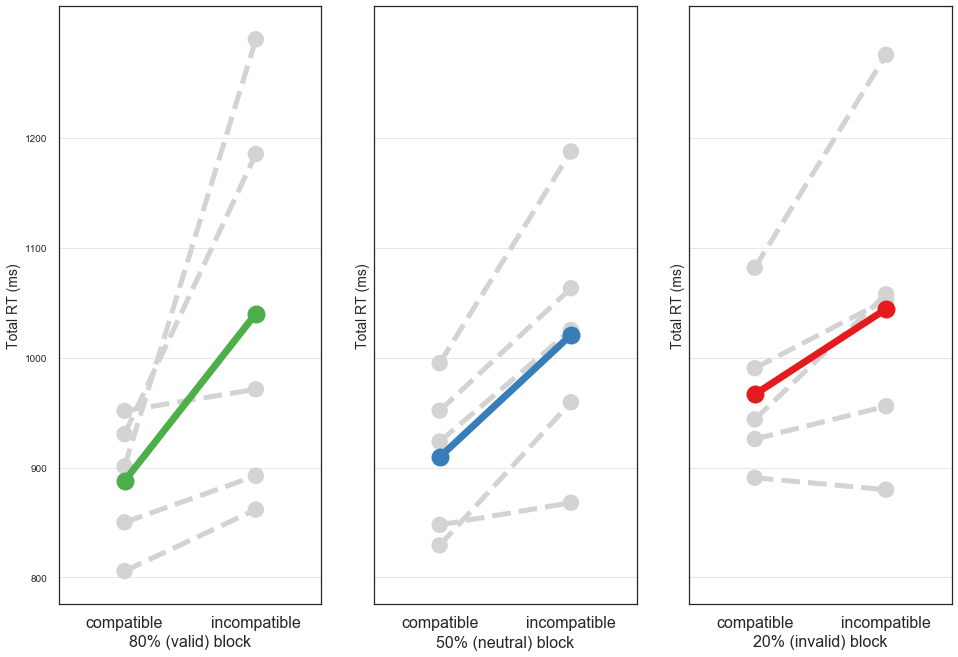

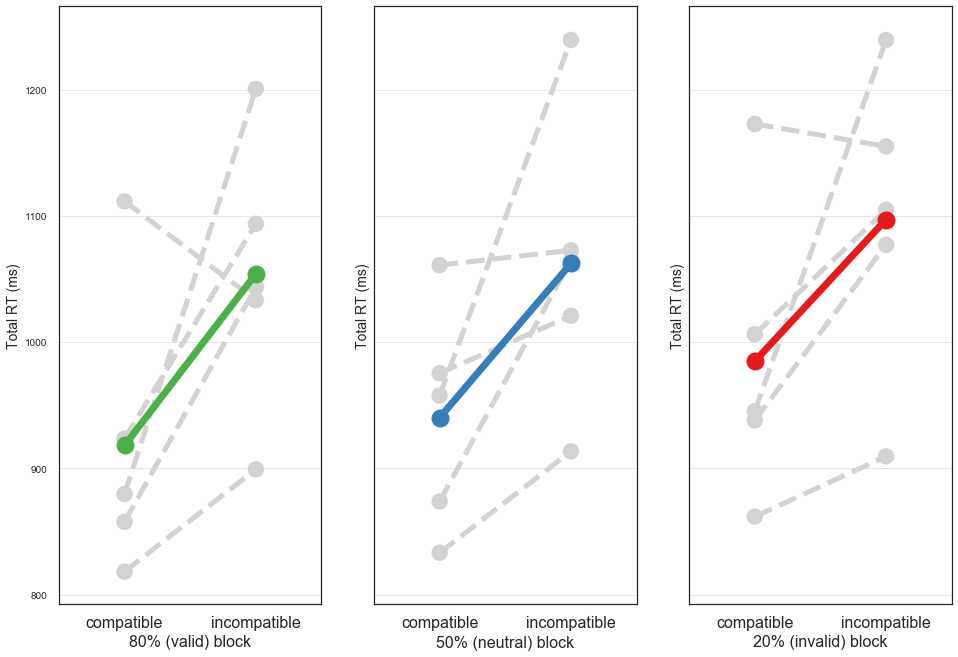

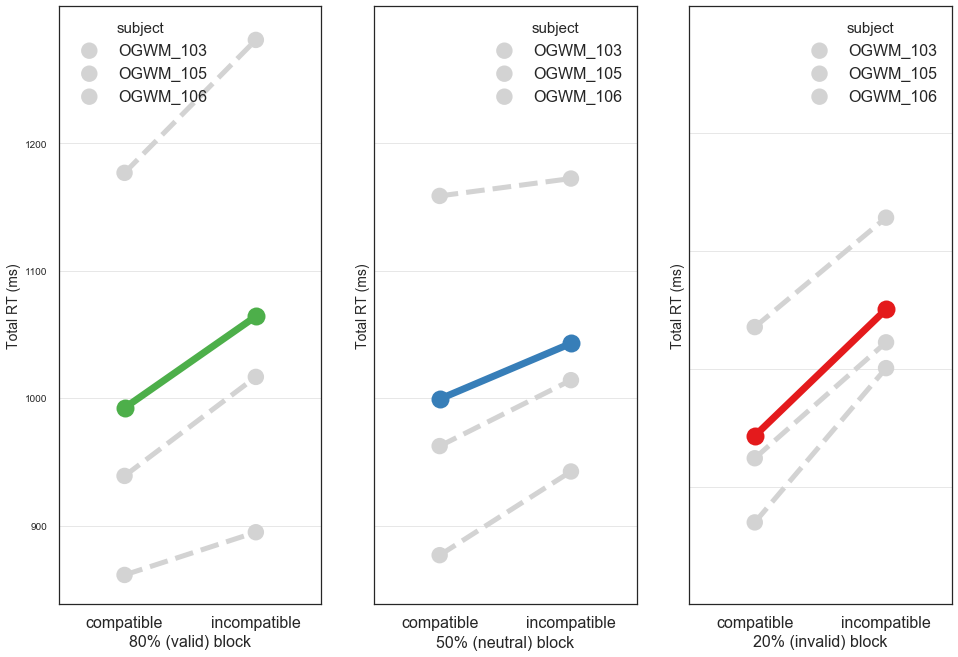

In [25]:
fig, ax = plt.subplots(1,3, sharey=True, sharex =False, figsize = (16,11))
size=8
fs=12

data = df_combined_trimmed
#DV = 'msecRT'
types = ['valid', 'neutral', 'invalid']
x_labels = ['80% (valid) block', '50% (neutral) block', '20% (invalid) block']

pal = ['#D3D3D3']
mean_pal = ['#4daf4a', '#377eb8', '#e41a1c']

linestyles= ["--"] * len(subjects) #+ ["-"]
markers= ["o"] * len(subjects) #+ ["o"]


for i in range(len(types)):

    g=sns.factorplot(x='TrialType', y = DV, hue='subject', data = data[(data.BlockType==types[i])&(data.target=='no_TMS')], 
                     palette = pal, order = ['compatible','incompatible'], legend = False, size = size, scale = 1, 
                     ax = ax[i], alpha=0.7, linestyles = linestyles, markers = markers, errwidth=1.25, ci=None)
    
    # Plot means on top of these factor plots!!!
    ax[i].plot(mean_plots[i,:], 'o', color = mean_pal[i], markersize = 18, zorder=20)
    ax[i].plot(mean_plots[i,:], color = mean_pal[i], linewidth = 7, zorder=20)
    # labels 
    #ax[i].plot(0,data.DVs[i],'o')
    ax[i].tick_params(which='both', labelsize=fs-2)
    ax[i].set_xticklabels(['compatible','incompatible'], fontsize = fs + 4)
    ax[i].set_xlabel(x_labels[i], fontsize = fs + 4)
    #ax[i].set_ylim(600,1400)
    ax[i].set_yticks(np.arange(800,1300,100))
    ax[i].set_ylabel('Total RT (ms)', fontsize = fs+2)
    #ax1.set_yticklabels(fontsize = fs - 1)
    # setting ticks 
    ax[i].grid(b=True, which='major', color='k', linewidth=1, axis = 'y', alpha = 0.1)
    #ax[i].minorticks_on()
    #ax[i].grid(b=True,which='minor', color='k', linewidth=0.5, axis = 'y', alpha = 0.1, linestyle = '--')
    sns.despine(right = False, top = False)
    ax[i].legend_.remove()
    plt.close(g.fig)
    #plt.setp(ax.artists,alpha=.3)
plt.savefig('OGWM_block_TMS_facorplot_no_TMS.png', dpi=300)

fig2, ax2 = plt.subplots(1,3, sharey=True, sharex =False, figsize = (16,11))
for i in range(len(types)):

    g=sns.factorplot(x='TrialType', y = DV, hue='subject', data = data[(data.BlockType==types[i])&(data.target=='PFC_cTBS')], 
                     palette = pal, order = ['compatible','incompatible'], legend = False, size = size, scale = 1, 
                     ax = ax2[i], alpha=0.7, linestyles = linestyles, markers = markers, errwidth=1.25, ci=None)
    
    # Plot means on top of these factor plots!!!
    ax2[i].plot(mean_plots_cTBS[i,:], 'o', color = mean_pal[i], markersize = 18, zorder=20)
    ax2[i].plot(mean_plots_cTBS[i,:], color = mean_pal[i], linewidth = 7, zorder=20)
    # labels 
    #ax[i].plot(0,data.DVs[i],'o')
    ax2[i].tick_params(which='both', labelsize=fs-2)
    ax2[i].set_xticklabels(['compatible','incompatible'], fontsize = fs + 4)
    ax2[i].set_xlabel(x_labels[i], fontsize = fs + 4)
    #ax[i].set_ylim(600,1400)
    ax2[i].set_yticks(np.arange(800,1300,100))
    ax2[i].set_ylabel('Total RT (ms)', fontsize = fs+2)
    #ax1.set_yticklabels(fontsize = fs - 1)
    # setting ticks 
    ax2[i].grid(b=True, which='major', color='k', linewidth=1, axis = 'y', alpha = 0.1)
    #ax[i].minorticks_on()
    #ax[i].grid(b=True,which='minor', color='k', linewidth=0.5, axis = 'y', alpha = 0.1, linestyle = '--')
    sns.despine(right = False, top = False)
    ax2[i].legend_.remove()
    plt.close(g.fig)
    
plt.savefig('OGWM_block_TMS_facorplot_cTBS.png', dpi=300)

fig3, ax3 = plt.subplots(1,3, sharey=True, sharex =False, figsize = (16,11))
for i in range(len(types)):

    g=sns.factorplot(x='TrialType', y = DV, hue='subject', data = data[(data.BlockType==types[i])&(data.target=='PFC_iTBS')], 
                     palette = pal, order = ['compatible','incompatible'], legend = False, size = size, scale = 1, 
                     ax = ax3[i], alpha=0.7, linestyles = linestyles, markers = markers, errwidth=1.25, ci=None)
    
    # Plot means on top of these factor plots!!!
    ax3[i].plot(mean_plots_iTBS[i,:], 'o', color = mean_pal[i], markersize = 18, zorder=20)
    ax3[i].plot(mean_plots_iTBS[i,:], color = mean_pal[i], linewidth = 7, zorder=20)
    # labels 
    #ax[i].plot(0,data.DVs[i],'o')
    ax3[i].tick_params(which='both', labelsize=fs-2)
    ax3[i].set_xticklabels(['compatible','incompatible'], fontsize = fs + 4)
    ax3[i].set_xlabel(x_labels[i], fontsize = fs + 4)
    #ax[i].set_ylim(600,1400)
    ax3[i].set_yticks(np.arange(800,1300,100))
    ax3[i].set_ylabel('Total RT (ms)', fontsize = fs+2)
    #ax1.set_yticklabels(fontsize = fs - 1)
    # setting ticks 
    ax3[i].grid(b=True, which='major', color='k', linewidth=1, axis = 'y', alpha = 0.1)
    #ax[i].minorticks_on()
    #ax[i].grid(b=True,which='minor', color='k', linewidth=0.5, axis = 'y', alpha = 0.1, linestyle = '--')
    sns.despine(right = False, top = False)
    #ax3[i].legend_.remove()
    plt.close(g.fig)
    

In [ ]:
# test interaction within each subject? ie 3/5 people show interaction? 